In [7]:
import pandas as pd
import itertools

# Load the dataset
team_data = pd.read_csv('Combined_Team_Data_with_Averages.csv')

# Ensure numeric columns are identified
numeric_columns = team_data.select_dtypes(include=['float64', 'int64']).columns

# Create all possible matchups (Team A vs Team B)
teams = team_data['Current Team'].unique()
matchups = list(itertools.combinations(teams, 2))

# Generate the matchup dataset
matchup_data = []
for team_a, team_b in matchups:
    stats_a = team_data[team_data['Current Team'] == team_a].iloc[0]
    stats_b = team_data[team_data['Current Team'] == team_b].iloc[0]
    
    # Calculate differences only for numeric columns
    matchup = {
        'Team_A': team_a,
        'Team_B': team_b,
    }
    for column in numeric_columns:
        matchup[f'{column}_diff'] = stats_a[column] - stats_b[column]
    
    # Assume the target: if Team A has better stats, it wins (1), else Team B wins (0)
    matchup['Winner'] = 1 if stats_a[numeric_columns].mean() > stats_b[numeric_columns].mean() else 0
    
    matchup_data.append(matchup)

# Create the matchup DataFrame
matchup_df = pd.DataFrame(matchup_data)

# Save for reference
matchup_df.to_csv('matchups_data.csv', index=False)

In [8]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Assuming y_test and y_pred are defined earlier
# y_test: Actual labels
# y_pred: Predicted labels (binary 0 or 1)

# Check if y_test and y_pred have the correct format
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))  # Ensure both arguments are passed
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))  # Ensure y_pred_proba is the probability for the positive class

Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.88      0.93         8

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14

AUC Score: 1.0


Feature Importance:
              Feature  Importance
5           Overall M    0.156505
1           Overall K    0.155295
2           Overall D    0.149465
13        Hardpoint K    0.105046
20          Control K    0.077607
19        Hardpoint M    0.074271
14        Hardpoint D    0.071072
7    Search Destroy D    0.058479
21          Control D    0.043824
25         Control CP    0.027975
18       Hardpoint TM    0.015347
12   Search Destroy M    0.010401
26          Control M    0.007893
6    Search Destroy K    0.007407
9    Search Destroy -    0.005388
11  Search Destroy FK    0.004873
4           Overall -    0.004489
15       Hardpoint KD    0.004106
3          Overall KD    0.003690
24         Control KM    0.003644
16        Hardpoint -    0.002855
8   Search Destroy KD    0.002710
22         Control KD    0.002195
17       Hardpoint KM    0.001692
10  Search Destroy KM    0.001424
0            Overall     0.001187
23          Control -    0.001158


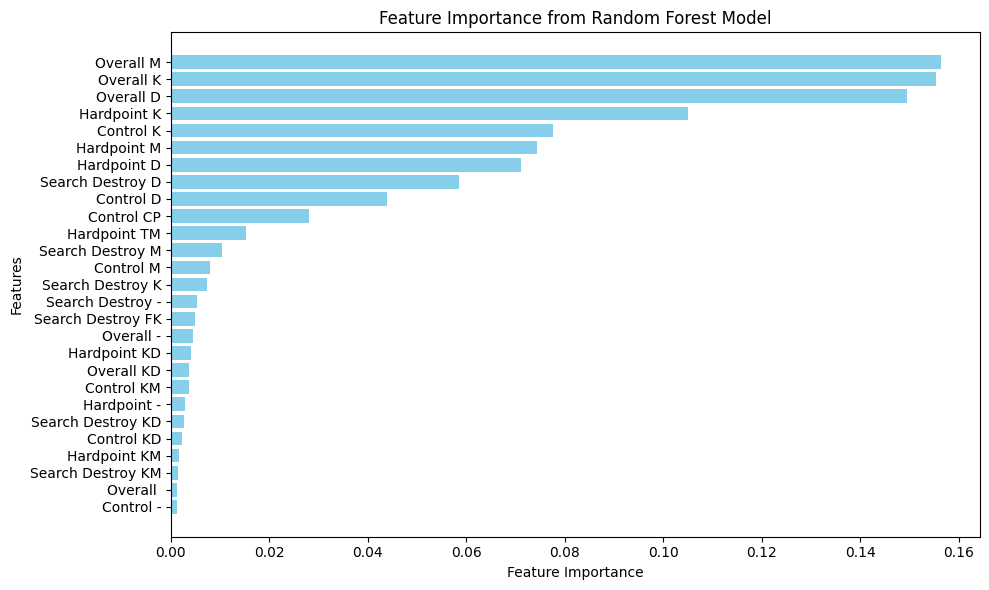

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'model' is your trained Random Forest model and 'numeric_columns' contains the feature names

# Get feature importance from the Random Forest model
feature_importance = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': numeric_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance table
print("Feature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()